### **install**

In [2]:
# !pip install numpy matplotlib opencv-python

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

### **numpy**

create an array

In [4]:
array_2d = np.array([[10, 20, 30],
                     [40, 50, 60]])
print(array_2d)


[[10 20 30]
 [40 50 60]]


In [21]:
array_2d_2 = np.array([[10, -120, 130],
                     [40, -30, 50]])

In [22]:
array_2d_2 + array_2d

array([[  20, -100,  160],
       [  80,   20,  110]])

In [5]:
print("-" * 100)
print(f"Shape (شکل): {array_2d.shape}")
print(f"Size (تعداد کل المان‌ها): {array_2d.size}")
print(f"Dtype (نوع داده): {array_2d.dtype}")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Shape (شکل): (2, 3)
Size (تعداد کل المان‌ها): 6
Dtype (نوع داده): int64
----------------------------------------------------------------------------------------------------


Create Common Arrays

In [ ]:
zeros_array = np.zeros((3, 4), dtype=np.uint8)
ones_array = np.ones((2, 2)) * 255 

Slicing

In [7]:
slice_example = array_2d[0, 0:3] 
print("--- اسلایس کردن (Slicing) ---")
print(f"سطر اول: {slice_example}")
# انتخاب عنصر در سطر دوم و ستون سوم
print(f"عنصر (1, 2): {array_2d[1, 2]}") 
print("-" * 20)

--- اسلایس کردن (Slicing) ---
سطر اول: [10 20 30]
عنصر (1, 2): 60
--------------------


### **Matplotlib**

In [8]:
dummy_image = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8)

In [9]:
print(dummy_image)

[[191 209 162 172 120  23 139 127 186  77]
 [182 203  43 236 209 145 209  18  91   7]
 [ 40 248  20 241 161 232   5  87  41 239]
 [202   0  29 188 239  62 228 255  61 174]
 [ 37 153  30  66 158 107  45 108  97 246]
 [218  78  86 204  25  31 132  65  90 140]
 [193  83  46  50 203  34 118  83 100  73]
 [177 113  39  27 179 243 244  57 252  25]
 [ 97 177 220 221 166 249 161 197 182  93]
 [154 228  30  34 197  19 100 206 149 103]]


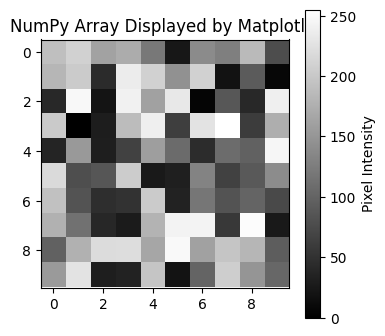

In [26]:
plt.figure(figsize=(4, 4))
plt.imshow(dummy_image, cmap='gray') 
plt.title("NumPy Array Displayed by Matplotlib")
plt.colorbar(label='Pixel Intensity')
plt.show()

### **OpenCV**

In [11]:
image_path = r'images/Lenna.png'

In [12]:
img = cv2.imread(image_path)

In [13]:
img.shape 

(512, 512, 3)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

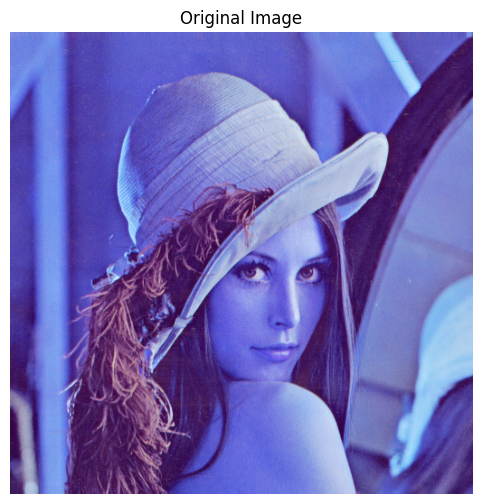

In [14]:
plt.figure(figsize=(15, 6))

plt.imshow(img, cmap='grey')
plt.title("Original Image")
plt.axis('off')

In [ ]:
H, W, C = img.shape

In [16]:
# 1. Image Slicing (Region of Interest - ROI)
# Select a central 50x50 area of the original image
# Note: H, W were defined in Section 2
start_row = H // 4
end_row = 3 * H // 4
start_col = W // 4
end_col = 3 * W // 4

roi = img[start_row:end_row, start_col:end_col] # Slicing for rows and columns
print(f"ROI Shape: {roi.shape}")
print("-" * 30)


ROI Shape: (256, 256, 3)
------------------------------


In [ ]:

R_channel = img[:, :, 0]

red_only_img = img.copy()
red_only_img[:, :, 1] = 0 # Green channel set to zero
red_only_img[:, :, 2] = 0 # Blue channel set to zero
print("Red Channel Max Value:", np.max(R_channel))

Red Channel Max Value: 225


In [18]:
# 3. Simple Mathematical Operation (Brightness Increase)
# Add a constant value (e.g., 50) to all pixel intensities
# np.clip is used to keep values within the valid range [0, 255]
brightness_increase = np.clip(img.astype(np.int16) + 50, 0, 255).astype(np.uint8)
print("Brightness Increased. Check the displayed image.")

Brightness Increased. Check the displayed image.


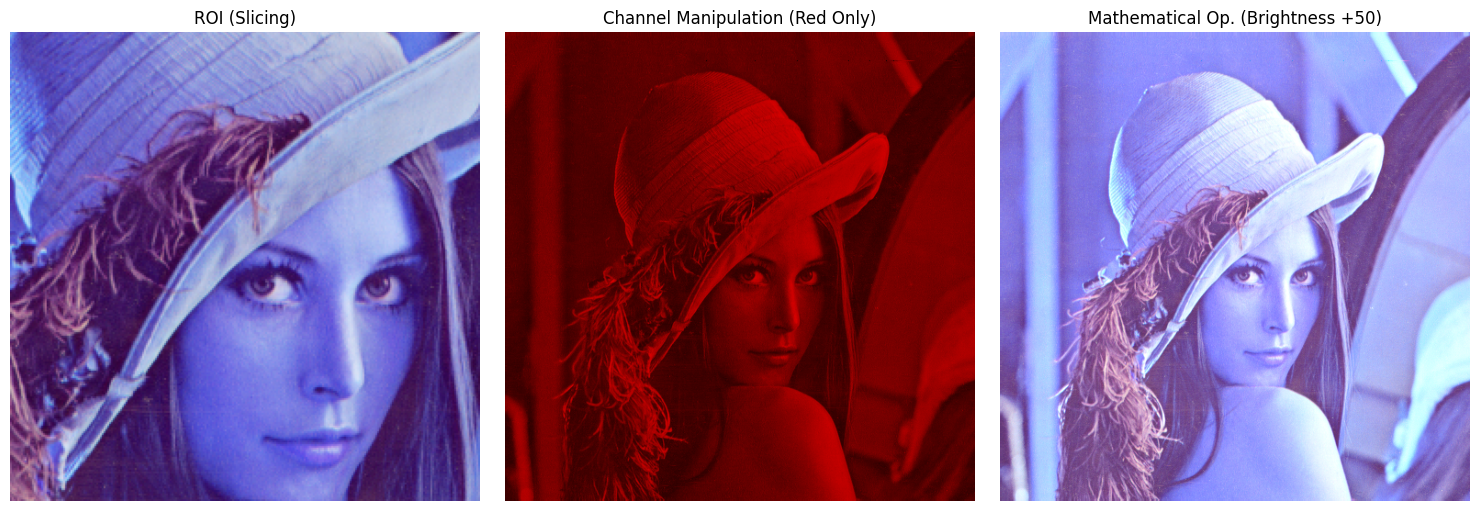

In [28]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(roi)
plt.title("ROI (Slicing)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(red_only_img)
plt.title("Channel Manipulation (Red Only)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(brightness_increase)
plt.title("Mathematical Op. (Brightness +50)")
plt.axis('off')

plt.tight_layout()
plt.show()

### **تمارین**  

<div dir="rtl">
تمرین 1
: تعاریف


<ol>
<li>dtype</li>
<li>uint8</li>
<li>uint16</li>
<li>انواع cmap ها رو روی یک تصویر greyscale  نمایش بدید</li>
</ol>

</div>


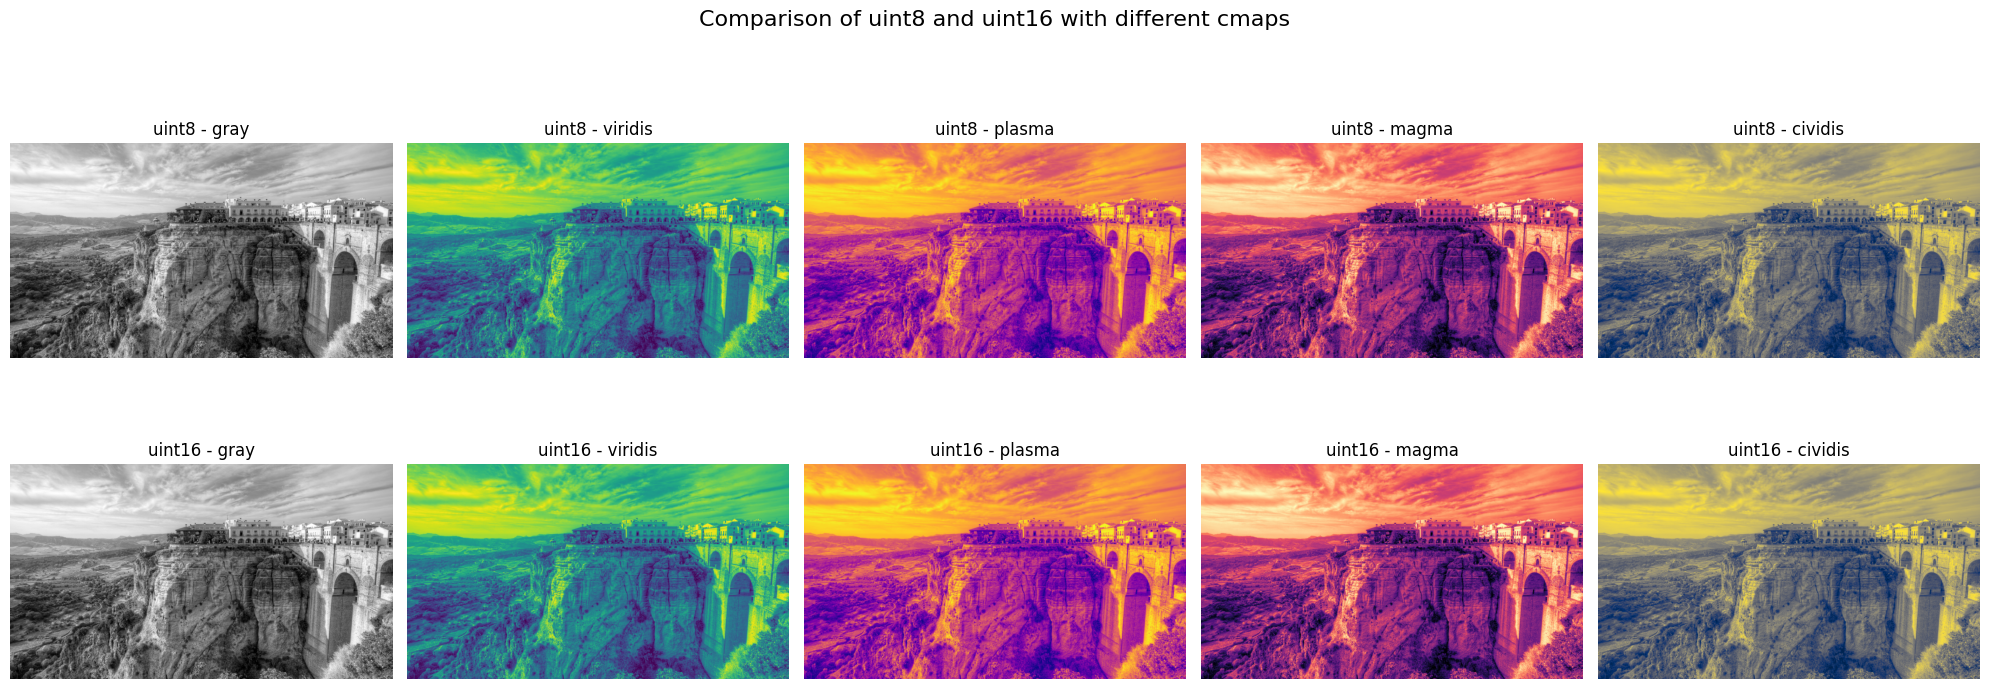

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = r"C:\Users\mosta\OneDrive\Pictures\image_1.jpg" 
cmaps = ['gray', 'viridis', 'plasma', 'magma', 'cividis']

# --- خواندن تصویر ---
img_bgr = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
if img_bgr is None:
    raise FileNotFoundError(f"تصویر در آدرس {image_path} پیدا نشد!")

# --- تبدیل به grayscale ---
if len(img_bgr.shape) == 3 and img_bgr.shape[2] == 3:
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img_bgr

# --- تبدیل dtype ---
img_uint8 = img_gray.astype(np.uint8)
img_uint16 = (img_gray.astype(np.uint16) * 256)  # بزرگ‌نمایی برای uint16

# --- نمایش ---
fig, axes = plt.subplots(2, len(cmaps), figsize=(4*len(cmaps), 8))
fig.suptitle("Comparison of uint8 and uint16 with different cmaps", fontsize=16)

for i, cmap in enumerate(cmaps):
    axes[0, i].imshow(img_uint8, cmap=cmap, vmin=0, vmax=255)
    axes[0, i].set_title(f'uint8 - {cmap}')
    axes[0, i].axis('off')
   
    axes[1, i].imshow(img_uint16, cmap=cmap, vmin=0, vmax=65535)
    axes[1, i].set_title(f'uint16 - {cmap}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()
 

<div dir="rtl">
تمرین 2
: برش تصویر و تغییر رنگ به صورت دستی


<ol>
<li>  تصویر را بخوانید</li>
<li> موقعیت حدودی چشم ها با به دست آورید </li>
<li> شدت نور در آن قسمت را تقسیم بر 10 کنید  </li>
<li> تصویر جدید را در کنار تصویر اصلی نمایش دهید </li>
</ol>

</div>


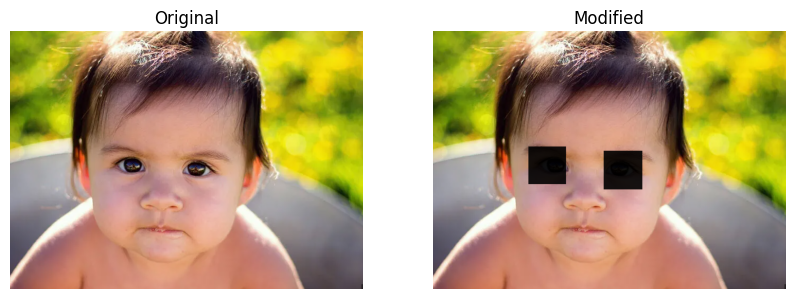

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری تصویر
img = cv2.imread(r"C:\Users\mosta\OneDrive\Pictures\Screenshots\Screenshot 2025-11-08 022956.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

# Haar cascade چشم
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6, minSize=(30,30))

# فقط چشم‌هایی که در نیمه بالایی تصویر هستند
eyes = [e for e in eyes if e[1] < img.shape[0]//2]

# اگر چندین چشم تشخیص داده شد، دو تا با x متفاوت (چپ و راست) انتخاب کن
eyes = sorted(eyes, key=lambda x: x[0])  # مرتب بر اساس موقعیت افقی
eyes = eyes[:2]  # فقط دو چشم اول

# تصویر جدید
img_new = img.astype(np.float32)

for (x, y, w, h) in eyes:
    eye_region = img_new[y:y+h, x:x+w]
    intensity = np.mean(eye_region)
    factor = (intensity/10)/intensity
    img_new[y:y+h, x:x+w] = eye_region * factor

img_new = np.clip(img_new, 0, 255).astype(np.uint8)

# نمایش
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Modified")
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<div dir="rtl">
تمرین 3

ساخت یک تصویر رنگی از سه کانال مجزا



<ol>
<li>

ساخت آرایه‌ی پایه: سه آرایه‌ی تک‌بُعدی خاکستری $50 \times 50$ با نام‌های R_arr, G_arr, و B_arr بسازید (با np.zeros یا np.ones یا پر کردن با یک مقدار ثابت)
<ul>
<li>R_arr: پر از مقدار ۲۵۵ (قرمز کامل)</li>
<li>G_arr: پر از مقدار ۱۰۰ (سبز ضعیف)</li>
<li>B_arr: پر از مقدار ۰ (آبی صفر)</li>
</ul>

</li>

<li>تغییر سایز: اندازه‌ی هر سه آرایه را به $100 \times 100$ تغییر دهید (مثلاً با Slicing)</li>
<li>تلفیق (Merge)</li>
<li>نمایش: تصویر رنگی نهایی را نمایش دهید.</li>
</ol>




</div>

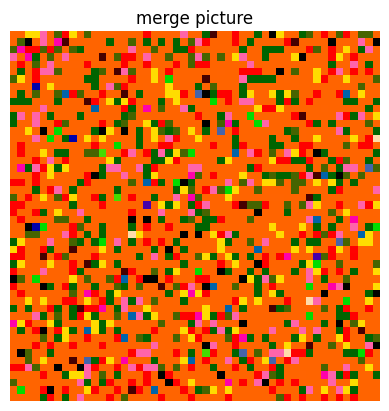

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تابع ساخت آرایه اولیه با ۸۰٪ مقدار اصلی و ۲۰٪ با مقدار ثابت + صفر/یک
def create_initial_array_v2(main_value, alt_value, shape=(50,50)):
    total = shape[0]*shape[1]
    num_main = int(total * 0.8)
    num_alt = total - num_main

    # تعداد صفر و یک در بخش alt
    num_zero = num_alt // 3
    num_one = num_alt // 3
    num_alt_val = num_alt - num_zero - num_one

    arr_flat = np.array([main_value]*num_main + [alt_value]*num_alt_val + [0]*num_zero + [1]*num_one, dtype=np.uint8)
    np.random.shuffle(arr_flat)
    arr = arr_flat.reshape(shape)
    return arr

# آرایه‌های اولیه
R_arr = create_initial_array_v2(main_value=255, alt_value=70)
G_arr = create_initial_array_v2(main_value=100, alt_value=220)
B_arr = create_initial_array_v2(main_value=0, alt_value=170)

# آرایه‌های بزرگ‌تر 100x100
R_big = np.zeros((100,100), dtype=np.uint8)
G_big = np.zeros((100,100), dtype=np.uint8)
B_big = np.zeros((100,100), dtype=np.uint8)

# تابع کپی اسلایس به اسلایس
def slice_expand(small_arr, big_arr):
    small_h, small_w = small_arr.shape
    big_h, big_w = big_arr.shape
    block_h = big_h // small_h
    block_w = big_w // small_w
   
    for i in range(small_h):
        for j in range(small_w):
            big_arr[i*block_h:(i+1)*block_h, j*block_w:(j+1)*block_w] = small_arr[i,j]
    return big_arr

# اعمال کپی اسلایس به اسلایس
R_big = slice_expand(R_arr, R_big)
G_big = slice_expand(G_arr, G_big)
B_big = slice_expand(B_arr, B_big)

# ترکیب سه کانال
rgb_image = np.dstack((R_big, G_big, B_big))

# نمایش تصویر
plt.imshow(rgb_image)
plt.title("merge picture")
plt.axis('off')
plt.show()